# SciPy
[(**Sci**entific **Py**thon)](https://www.scipy.org/)

## Содержание
 * [Особенности](#Особенности)
 * [Графики matplotlib](#matplotlib)
 * [Линейная алгебра](#linalg)
 * [Интерполяция](#interpolate)
 * [Оптимизация](#optimize)

# <a id="Особенности"><span style="color:green">Особенности</span></a>

`SciPy` — библиотека с открытым исходным кодом, предназначенная для выполнения научных и инженерных расчётов.

Возможности:
- поиск минимумов и максимумов функций;
- вычисление интегралов функций;
- поддержка специальных функций;
- обработка сигналов;
- обработка изображений;
- работа с генетическими алгоритмами;
- решение обыкновенных дифференциальных уравнений;  
    и др.

Основной структурой данных в `SciPy` является многомерный массив, реализованный модулем `NumPy`.

SciPy ключает в себя множество пакетов, но мы рассмотрим только некоторые:
- linalg (линейная алгебра)
- interpolate (инструменты для интерполяции.)
- optimize (средства оптимизации)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Чтобы наглядно продемонстрировать возможность SciPy нам нужен инструмент для визуализации, подробнее о визуализации поговорим отдельно, а сейчас рассмотрим простые примеры использования matplotlib.

# <a id="matplotlib"><span style="color:green">Графики matplotlib</span></a>

Для визуализации результатов расчётов часто используется библиотека Matplotlib.   
Рассмотрим примеры

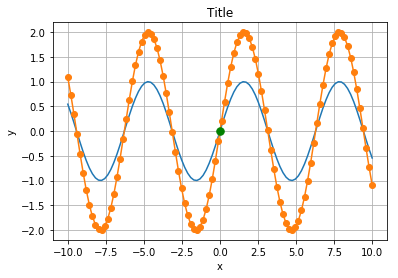

In [2]:
# что будем изображать
x = np.linspace(-10, 10, 100)
y = np.sin(x)
point = (0, 0)

# настройка отображения
plt.grid(True)      # сетка
plt.title('Title')  # название графика
plt.xlabel('x')     # подписи к осям
plt.ylabel('y')

plt.plot(x, y);     # график функции
plt.plot(x, 2 * y, '-o')
plt.plot(point[0], point[1], '.', markersize=15, c='green'); 

Scatter plot

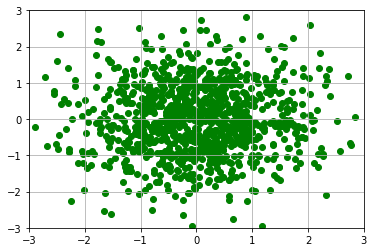

In [3]:
n = 1024
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)

plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(x, y, c='green');

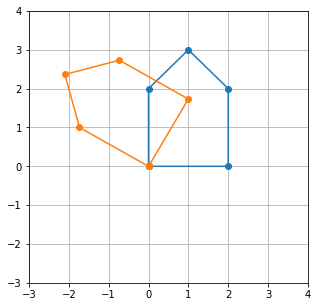

In [4]:
phi = np.pi/3
A = np.array([[ np.cos(phi), -np.sin(phi)], 
              [ np.sin(phi), np.cos(phi)]])

points = np.array([[0, 0], [2, 0], [2, 2], 
                   [1, 3], [0, 2], [0, 0]])

plt.figure(figsize=(5, 5))
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.grid(True)

new_points = A @ points.T
plt.plot(new_points[0, :], new_points[1, :], 'o-');

# <a id="linalg"><span style="color:green">Линейная алгебра</span></a>

Линейная алгебра — это раздел математики, изучающий векторы, векторные пространства, линейные преобразования и системы линейных уравнений. Линейная алгебра первоначально и возникла как наука о решении систем линейных алгебраических уравнений.

## Собственные числа и собственные векторы
Для квадратных матриц определены понятия собственного вектора и собственного числа.

Пусть $A$ — квадратная матрица и $A \in \mathbb{R}^{n \times n}$. **Собственным вектором** (eigenvectors) матрицы $A$ называется такой ненулевой вектор $x \in \mathbb{R}^{n}$, что для некоторого $\lambda \in \mathbb{R}$ выполняется равенство:   
$$Ax = \lambda x$$
При этом $\lambda$ называется **собственным числом** (eigenvalues) матрицы $A$. 
Собственные числа и собственные векторы матрицы играют важную роль в теории линейной алгебры и ее практических приложениях.   
*eigen читается как 'айген' 
   
**Где понадобится: PCA(метод главных компонет)**  

In [5]:
from scipy.linalg import eig, norm

In [6]:
# симметричная матрица
# собственные значения симметричной матрицы - ортогональны
m = np.array([[3, 4], 
              [4, 3]])
print(m)

[[3 4]
 [4 3]]


In [7]:
# eigenvalues & eigenvectors
eigval, eigvect = eig(m)
norm(eigvect[:, 0])

0.9999999999999999

In [8]:
# собственные векторы по столбцам
eigvect

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [9]:
eigval

array([ 7.+0.j, -1.+0.j])

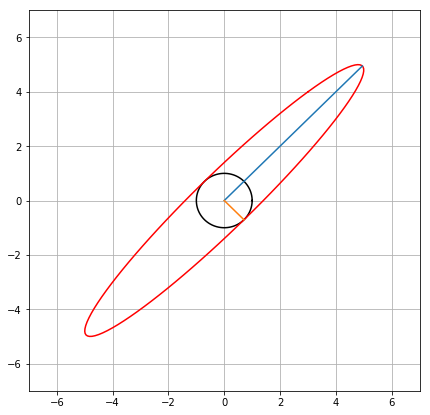

In [10]:
def circle(angle, r=1):
    x = r * np.cos(angle)
    y = r * np.sin(angle)
    return x, y

angle = np.linspace(0, 2*np.pi, 100)
x, y = circle(angle)
fig = plt.figure(figsize=(7, 7))
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.grid(True)
vec = m @ np.array([x, y])
plt.plot(x, y, color='black')
plt.plot(vec[0], vec[1], color='red');
plt.plot([0, eigvect[0, 0] * eigval[0].real], [0, eigvect[1, 0] * eigval[0].real])
plt.plot([0, eigvect[0, 1] * eigval[1].real], [0, eigvect[1, 1] * eigval[1].real]);

## Обратная матрица

Для квадратных невырожденных матриц определено понятие **обратной** матрицы. 

Пусть $A$ — квадратная невырожденная матрица. Матрица $A^{-1}$ называется **обратной матрицей** к $A$, если 

$$AA^{-1} = A^{-1}A = I,
$$ 

где $I$ — единичная матрица.  

**Где понадобится: при изучении аналитических решений, например в методе наименьших квадратов**

In [11]:
from scipy.linalg import inv

In [12]:
a = np.array([[1, 2, 1], 
              [1, 1, 4], 
              [2, 3, 6]], dtype=np.float32)
a_inv = inv(a)

In [13]:
print(a_inv)

[[ 6.  9. -7.]
 [-2. -4.  3.]
 [-1. -1.  1.]]


In [14]:
a @ a_inv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

## Сингулярное разложение матриц (SVD)

Из wiki:   
**Сингулярным разложением матрицы** $M$ порядка $m \times n$ является разложение следующего вида:

$$M = U \Sigma V^*, $$
где
где  $\Sigma$  — матрица размера $ m\times n$  с неотрицательными элементами, у которой элементы, лежащие на главной диагонали — это сингулярные числа (а все элементы, не лежащие на главной диагонали, являются нулевыми), а матрицы $U$  порядка $m$ и $V$ порядка $n$ — это две унитарные матрицы, состоящие из левых и правых сингулярных векторов соответственно (а $V^∗$  — это сопряжённо-транспонированная матрица к $V$).  

В некоторых практических задачах требуется приближать заданную матрицу $M$ некоторой другой матрицей $M_k$  с заранее заданным рангом $k$. Известна следующая теорема, которую иногда называют теоремой Эккарта — Янга.  

Если потребовать, чтобы такое приближение было наилучшим в том смысле, что Фробениусова норма разности матриц $M$ и $M_k$ былф минимальна, при ограничении $rank ( M_k ) = k$, то оказывается, что наилучшая такая матрица $M_k$ получается из сингулярного разложения матрицы $M $ по формуле:
$$M_k = U_k \Sigma_k V_k^* $$

Во многом благодаря этому свойству сингулярное разложение и находит широкое практическое применение: в сжатии данных, обработке сигналов, численных итерационных методах для работы с матрицами, методе главных компонент, латентно-семантическом анализе и прочих областях.   
О сингулярном разложении хорошо написано на [википедии](https://ru.wikipedia.org/wiki/Сингулярное_разложение)

**Где понадобится:PCA, LSA, рекомендательные системы**

In [15]:
from scipy.linalg import svd

X = np.random.randn(4, 3)
print(X)
U, D, V = svd(X)
print(U.shape, D.shape, V.shape)
print(type(U), type(D), type(V))

[[-0.33072999  0.95660797 -0.27382346]
 [ 2.67968138  1.17096526  0.82028292]
 [-0.57796244  1.37560789 -0.26253373]
 [-0.48738873  0.43482014  0.88167383]]
(4, 4) (3,) (3, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Решение системы линйных алгебраических уравнений (СЛАУ)

Общий вид системы линейных алгебраических уравнений:

$$\begin{cases}
 a_{11}x_{1}+a_{12}x_{2}+\dots +a_{1n}x_{n}=b_{1}\\
a_{21}x_{1}+a_{22}x_{2}+\dots +a_{2n}x_{n}=b_{2}\\
\dots \\
a_{m1}x_{1}+a_{m2}x_{2}+\dots +a_{mn}x_{n}=b_{m}\\
\end{cases}$$

Здесь $m$ — количество уравнений, а $n$  — количество переменных, $ x_{1},x_{2},\dots ,x_{n}$ — неизвестные, которые надо определить, коэффициенты $a_{11},a_{12},\dots ,a_{mn}$ и свободные члены $b_{1},b_{2},\dots ,b_{m}$ предполагаются известными.  

Система линейных алгебраических уравнений может быть представлена в матричной форме как:

$$\begin{pmatrix}
a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\
\vdots &\vdots &\ddots &\vdots \\
a_{m1}&a_{m2}&\cdots &a_{mn}
\end{pmatrix}
\begin{pmatrix}x_{1}\\x_{2}\\\vdots \\x_{n}\end{pmatrix}
\begin{pmatrix}b_{1}\\b_{2}\\\vdots \\b_{m}\end{pmatrix}$$
или
$$Ax = b$$

**Критерий совместности СЛАУ (теорема Кронекера — Капелли)**   
Система линейных алгебраических уравнений совместна тогда и только тогда, когда ранг её основной матрицы равен рангу её расширенной матрицы, причём система имеет единственное решение, если ранг равен числу неизвестных, и бесконечное множество решений, если ранг меньше числа неизвестных.

Ранг - максимальное число линейно независимых строк (столбцов).

Пример

$$\begin{cases}
2 x_{1} + 4 x_{2}+ 3 x_{3}=3 \\
4 x_{1} + 9  x_{2} - x_{3}=6 \\
3 x_{1} + 6 x_{2} + 2 x_{3}=4.5 
\end{cases}$$

In [16]:
A = np.array([[2, 4,  3],
              [4, 9, -1],
              [3, 6,  2]])

b = np.array([3, 6, 4.5])

<span style="color:blue">Примените теорему Кронекера-Капелли. 
Найдите ранг расширенной матрицы, сделайте выводы:</span>

In [17]:
from numpy.linalg import matrix_rank

In [18]:
# найдите ранг расширенной матрицы 
matrix_rank(np.column_stack((A, b))) == matrix_rank(A)

True

In [19]:
from scipy.linalg import solve

In [20]:
x = solve(A, b)

In [21]:
print(x)

[ 1.5 -0.   0. ]


In [22]:
A = np.array([[2, 4,  3],
              [4, 8, -1],
              [3, 6,  2]])

In [23]:
matrix_rank(np.column_stack((A, b)))

2

In [24]:
x = solve(A, b)

LinAlgError: Matrix is singular.

In [25]:
# print(x)

# <a id="interpolate"><span style="color:green">Интерполяция</span></a>

**Интерполяция** - это способ вычислить промежуточное значение функции по нескольким уже известным ее значениям.    
  
Многим из тех, кто сталкивается с научными и инженерными расчётами, часто приходится оперировать наборами значений, полученных опытным путём или методом случайной выборки. Как правило, на основании этих наборов требуется построить функцию, на которую могли бы с высокой точностью попадать другие получаемые значения. Такая задача называется *аппроксимацией*. **Интерполяцией называют такую разновидность аппроксимации, при которой кривая построенной функции проходит ТОЧНО через имеющиеся точки данных.**

In [26]:
from scipy import interpolate

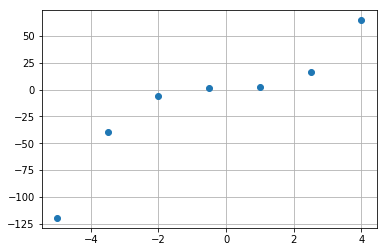

In [27]:
x = np.arange(-5, 5, 1.5)
func = lambda x: np.exp(-x / 3) + x**3 + 0.2
y =func(x)

plt.rcParams.figsize = (5, 5)
plt.grid(True)
plt.plot(x, y, 'o');

## Кусочно-линейная интерполяция

Как узнать значения между точками? Просто соединим попарно точки прямой:

In [28]:
f = interpolate.interp1d(x, y)

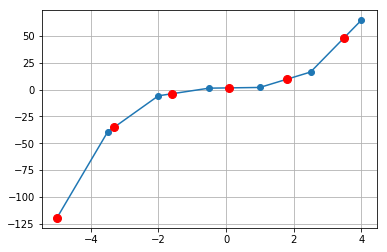

In [29]:
xnew = np.arange(-5, 5, 1.7)
ynew = f(xnew)
plt.grid(True)
plt.plot(x, y, '-o')
plt.plot(xnew, ynew, 'o', c='r', markersize=8);

## Интерполяция полиномом Лагранжа

[Подробнее об интерполяции полиномом Лагранжа](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%87%D0%BB%D0%B5%D0%BD_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0)

In [30]:
np.random.seed(21)
x_1 = np.random.choice(x, 2, replace=False)
print(x_1)
poly_1 = interpolate.lagrange(x_1, func(x_1))
x_2 = np.random.choice(x, 3, replace=False)
print(x_2)
poly_2 = interpolate.lagrange(x_2, func(x_2))
x_3 = np.random.choice(x, 4, replace=False)
print(x_3)
poly_3 = interpolate.lagrange(x_3, func(x_3))
poly_all = interpolate.lagrange(x, func(x))

[ 4. -2.]
[ 2.5 -5.  -3.5]
[-0.5  4.  -2.   2.5]


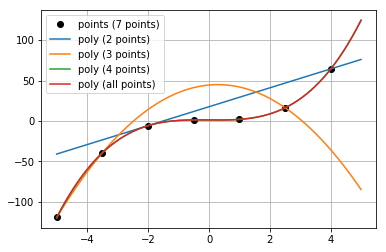

In [31]:
xnew = np.arange(-5, 5, 0.01)

plt.grid(True)

plt.plot(x, y, 'o', label='points (7 points)', c='k')
plt.plot(xnew, poly_1(xnew), label='poly (2 points)');
plt.plot(xnew, poly_2(xnew), label='poly (3 points)');
plt.plot(xnew, poly_3(xnew), label='poly (4 points)');
plt.plot(xnew, poly_all(xnew), label='poly (all points)');
plt.legend();

## Интерполяция кубическим сплайном

[**Кубический сплайн**](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B1%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D1%81%D0%BF%D0%BB%D0%B0%D0%B9%D0%BD) — гладкая функция, область определения которой разбита на конечное число отрезков, на каждом из которых она совпадает с некоторым кубическим многочленом (полиномом). 

Подробнее о сплайнах в `scipy` можно найти в [документации](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#spline-interpolation)

In [32]:
tck = interpolate.splrep(x, y)

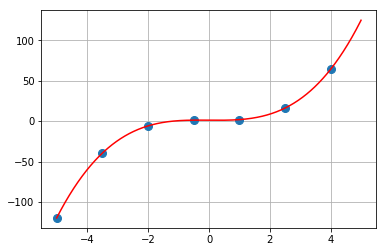

In [33]:
xnew = np.arange(-5, 5, 0.01)
ynew = interpolate.splev(xnew, tck=tck)
plt.grid(True)
plt.plot(x, y, 'o', markersize=8)
plt.plot(xnew, ynew, c='r');

# <a id="optimize"><span style="color:green">Оптимизация</span></a>

При помощи `scipy` можно решать различные задачи оптимизации. scipy предоставляет целый набор различных методов оптимизации.

In [34]:
from scipy import optimize

Положим нам дана некоторая функция:

In [35]:
f = lambda x: x ** 2 + 10 * np.sin(x) + 4 * np.cos(x / 2.)

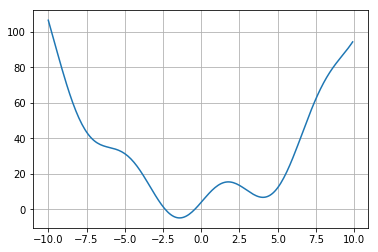

In [36]:
x = np.arange(-10, 10, 0.1)
plt.grid(True)
plt.plot(x, f(x));

Найдем миниум.  
`Scipy` предоставляет общий способ нахождения минимума функции. Ему нужно передать саму функцию и **начальное приближение**, начиная с которого алгоритм будет искать минимум

### Минимизация
Алгоритм BFGS (алгоритм Бройдена — Флетчера — Гольдфарба — Шанно) — один из наиболее широко применяемых алгоритмов минимизации.  
[Подробнее о BFGS](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D1%80%D0%BE%D0%B9%D0%B4%D0%B5%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BB%D0%B5%D1%82%D1%87%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%93%D0%BE%D0%BB%D1%8C%D0%B4%D1%84%D0%B0%D1%80%D0%B1%D0%B0_%E2%80%94_%D0%A8%D0%B0%D0%BD%D0%BD%D0%BE)

Документация по [optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

In [37]:
# x0 - начальное приближение
# method - алгоритм минимизации (по умолчанию BFGS)
res_obj = optimize.minimize(f, x0=0, method='BFGS')
res_obj

      fun: -4.836722311515954
 hess_inv: array([[0.08990184]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([-1.41693693])

In [38]:
x_min = res_obj['x'][0]
print(x_min)

-1.4169369285027937


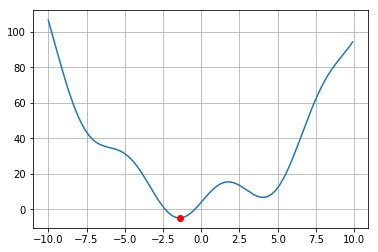

In [39]:
x = np.arange(-10, 10, 0.1)
plt.grid(True)
plt.plot(x, f(x));
plt.plot(x_min, f(x_min), 'o', c='r', );

Если выбрать неудачное начальное приближение, то возможно будет найден локальный, а не глобальный минимум

Здесь применим другой популярный [алгоритм](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D0%B5%D0%BB%D0%B4%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%9C%D0%B8%D0%B4%D0%B0)

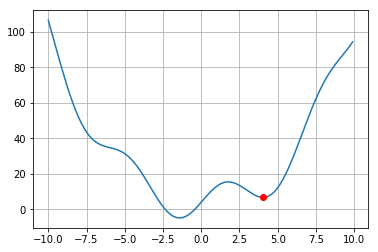

In [40]:
x_min =  optimize.minimize(f, x0=5, method='Nelder-Mead')['x'][0]
x = np.arange(-10, 10, 0.1)
plt.grid(True)
plt.plot(x, f(x));
plt.plot(x_min, f(x_min), 'o', c='r', );

## Метод наименьших квадратов, МНК (Ordinary Least Squares, OLS)

**МНК в регрессионном анализе**  
Пусть имеется $n$ значений некоторой переменной $y$  и соответствующих переменных $x$. Задача заключается в том, чтобы взаимосвязь между $y$ и $x$ аппроксимировать некоторой функцией $f(x, w)$, то есть фактически найти наилучшие значения параметров $w$ максимально приближающие значения $f (x, w)$ к фактическим значениям $y$. 

<span style="color:blue">Чем будем аппроксимировать? Какая "простая" функция приходит на ум? </span>

Правильно =) 

$$f(x_i, w) = \hat y_i = w_0 + w_1 x_i^1 + w_2 x_i^2 + \dots + w_n x_i^p = \langle w, x_i \rangle$$
$x_i = (1, x_i^1, x_i^2, \dots, x_i^p)$  
$w = (w_0, w_1, w_2, \dots, w_p)$

$$Q(w) = \sum_{i=1}^n \mathcal{L}(y_i, \hat y_i) = \sum_{i=1}^n (\langle w, x_i \rangle - y_i)^2 \to \min_{w}$$

То же самое, но через матрицы  
Ловкость рук и никакого мошенничества...
$$\hat y = Xw$$
$$Q(w) = ||X w - y||^2 \to \min_{w}$$



$X$ - матрица признаков ($n \times p$) $n$ объектов, $p$ признаков,  
$x_i$ – вектор (i-ая строка в матрице $X$),   
$w$ – веса признаков (вектор размера $p$ + 1),   
$y$ – вектор целевых переменных (размера $n$),   
$\hat y$ – вектор предсказанного значения целевой переменной (размера $n$),   
$\mathcal{L}$ – функция потерь,  
$\langle a, b \rangle$ – скалярное произведение векторов a и b

<span style="color:blue">Как будем находить миниум? Давайте вспомним, а как для функции мы обычно находим минимум? Что-то там с производными...</span>

$$\frac{\partial{}}{\partial{w}}||X w - y||^2 = 2(X^TXw - X^T y) = ? $$

<span style="color:blue">Достаточное ли это условие для миниума?</span>  
Получаем решение:

$$w = (X^TX)^{-1} X^T y$$

Хмм...сравним с `sklearn.linear_model.LinearRegression`

**Сгенирируем данные для задачи регрессии**

In [41]:
from sklearn import datasets

Сгенерируем данные для задачи регрессии с помощью метода `make_regression`. Определим количество признаков `n_features`, количество информативных признаков `n_informative` (то, что действительно используется при получении target'а) и зададим стандартное отклонение нормального шума `noise`. Чтобы получить коэффициенты сгенерированной линейной зависимости укажем `coef=True`.

$$f(x, w) = w_1x_1 + noise$$

In [42]:
X, y, coef = datasets.make_regression(n_features=1, n_informative=1, noise=5., 
                                                    coef=True, random_state=21)

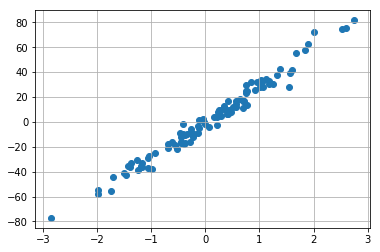

In [43]:
plt.grid(True)
plt.scatter(X[:,0], y);

Добавим единичный столбец:

In [44]:
X_ = np.column_stack((X, np.ones(X.shape[0])))

In [45]:
X_[:5]

array([[ 0.21020722,  1.        ],
       [ 0.06400443,  1.        ],
       [ 2.60281328,  1.        ],
       [ 1.2444828 ,  1.        ],
       [-0.28522504,  1.        ]])

**Наше аналитическое решение:**

In [46]:
%%time
w = inv(X_.T @ X_) @ X_.T @ y

CPU times: user 901 µs, sys: 0 ns, total: 901 µs
Wall time: 24.6 ms


In [47]:
w

array([28.76769115, -0.33063206])

In [48]:
coef

array(28.41432722)

Неплохо

In [49]:
f = lambda x, w:  np.column_stack((x, np.ones(x.shape[0]))) @ w

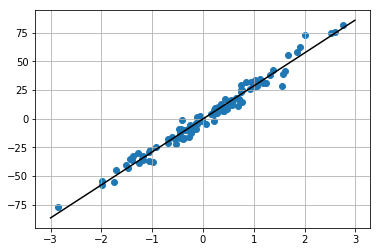

In [50]:
plt.grid(True)
x = np.arange(-3, 3, 0.01)
plt.scatter(X[:,0], y);
plt.plot(x, f(x, w), c='k');

Выглядит круто)

Давайте теперь опробуем `LinearRegression` из `sklearn`

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
%%time
linear_model = LinearRegression()
linear_model.fit(X, y)

CPU times: user 862 µs, sys: 0 ns, total: 862 µs
Wall time: 780 µs


In [53]:
linear_model.coef_

array([28.76769115])

In [54]:
linear_model.intercept_

-0.3306320614434779

Нет почти никакой разницы, а раз нет разницы зачем платить больше? =)

<span style="color:blue">Посмотрите еще раз на аналитическое решение, какие вы видите недостатки? Почему применяют численные методы оптимизации?</span>